<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Multi_Linear_Regression_Practice/Multi_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Iteba/Data-Science-Practice/refs/heads/main/Multi_Linear_Regression_Practice/student_performance.csv'
df = pd.read_csv(url)

# Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [5]:
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


# Preprocessing

In [6]:
X = df.drop('Performance Index', axis = 1)
y = df['Performance Index']

## Encoding

In [8]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']] = scaler.fit_transform(df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])

## Data Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

## Predictions

In [21]:
predictions = model.predict(X_test)

In [22]:
predictions

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

## Actual vs Predictions

Text(0.5, 1.0, 'Performance vs. Predicted Performance')

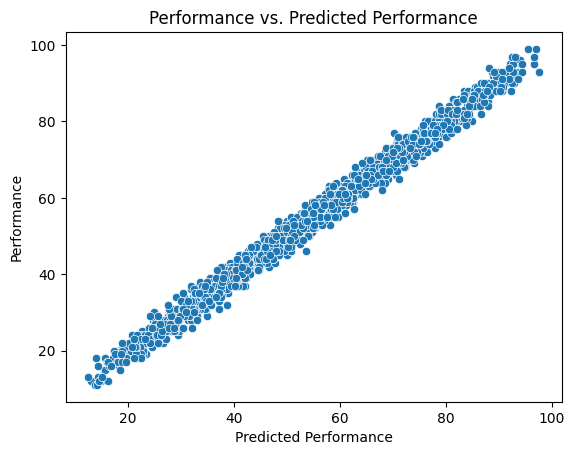

In [24]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel('Predicted Performance')
plt.ylabel('Performance')
plt.title('Performance vs. Predicted Performance')

### Y-test vs Predictions Correlation

Text(0.5, 1.0, 'Performance vs. Predicted Performance')

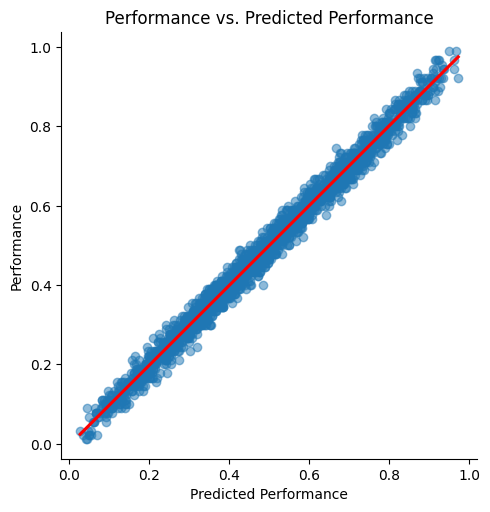

In [ ]:
sns.lmplot(
    x = 'Predicted Performance',
    y = 'Performance',
    data = pd.DataFrame(
        {
            'Predicted Performance': predictions,
            'Performance': y_test
        }
    ),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Performance vs. Predicted Performance')

## Error / Cost

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [26]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predictions))

Mean Absolute Error:  1.6111213463123049
Mean Squared Error:  4.082628398521857
Root Mean Squared Error:  2.0205515085050063


## Accuracy

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2 = r2_score(y_test, predictions)

In [29]:
print("R2: ", r2)

R2:  0.9889832909573145


## Residuals

In [30]:
residuals = y_test - predictions

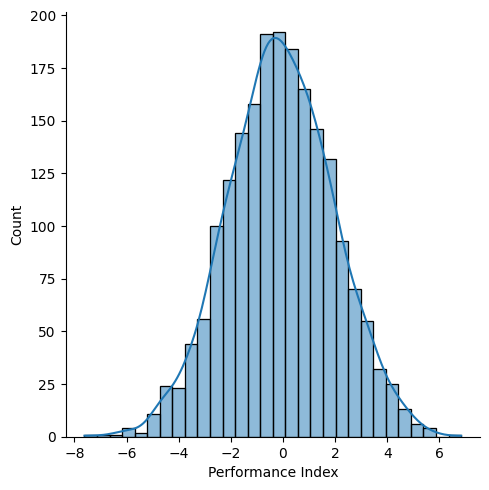

In [31]:
sns.displot(residuals, bins=30, kde=True)